In [1]:
# The CIFAR-10 DataSet
# The CIFAR-10 data set consists of 60000 32*32 colour images in 10 classes. with 60000 images per class.
# There are 50000 training images and 10000 test images.

# The dataset is divided into five training batchs and one testbatch. each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class.
# The training batches contain the remaining images in random order. but some training batches may contain more imagesfrom one class that another. Between them. the training
# batches contain exactly 5000 images from each class.

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
### Loading the dataset

In [4]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [5]:
print(X_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [6]:
print(y_train.shape)
print(X_train.shape)

(50000, 1)
(50000, 32, 32, 3)


In [7]:
###  Here we see there are 50000 training images and 1000 test images

In [8]:
print(y_train.shape)

(50000, 1)


In [9]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [10]:
###  y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [11]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [12]:
y_test = y_test.reshape(-1,)

In [13]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [14]:
### Let's plot some images to see what they are

In [15]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

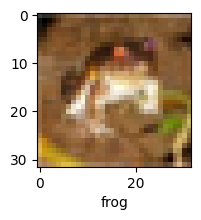

In [16]:
plot_sample(X_train, y_train, 0)

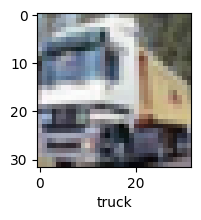

In [17]:
plot_sample(X_train, y_train, 1)

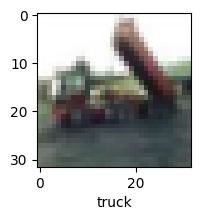

In [18]:
plot_sample(X_train, y_train, 2)

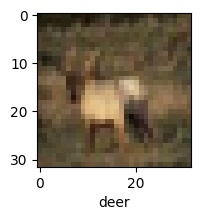

In [19]:
plot_sample(X_train, y_train, 3)

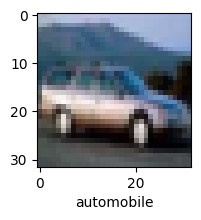

In [20]:
plot_sample(X_train, y_train, 4)

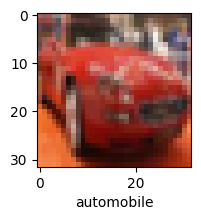

In [21]:
plot_sample(X_train, y_train, 5)

In [22]:
# Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

In [23]:
# Normalizing the training data

In [24]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [25]:
# Build simple artificial neural network for image classification

In [26]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 119s 76ms/step - accuracy: 0.3066 - loss: 1.9305
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 138s 74ms/step - accuracy: 0.4164 - loss: 1.6484
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 74ms/step - accuracy: 0.4532 - loss: 1.5499
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 150s 79ms/step - accuracy: 0.4827 - loss: 1.4867
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 77ms/step - accuracy: 0.4926 - loss: 1.4389


In [27]:
# You can see that at the end of 5 epochs, accuracy is at around 48.48%

In [28]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.50      0.60      0.54      1000
           1       0.61      0.63      0.62      1000
           2       0.38      0.35      0.37      1000
           3       0.34      0.40      0.37      1000
           4       0.41      0.45      0.43      1000
           5       0.34      0.45      0.39      1000
           6       0.65      0.30      0.41      1000
           7       0.66      0.43      0.52      1000
           8       0.52      0.70      0.60      1000
           9       0.60      0.48      0.53      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.48     10000
weighted avg       0.50      0.48      0.48     10000



In [29]:
# Now let us build a convolutional neural network to train our images


In [30]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
cnn.fit(X_train, y_train, epochs=10)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 36ms/step - accuracy: 0.3969 - loss: 1.6557
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 36ms/step - accuracy: 0.6136 - loss: 1.1031
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 35ms/step - accuracy: 0.6716 - loss: 0.9424
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 36ms/step - accuracy: 0.7065 - loss: 0.8457
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 35ms/step - accuracy: 0.7319 - loss: 0.7726
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 36ms/step - accuracy: 0.7547 - loss: 0.7046
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - accuracy: 0.7721 - loss: 0.6496
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.7942 - loss: 0.5937
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - accuracy: 0.8084 - loss: 0.5474
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - accuracy: 0.8242 - loss: 0.5029


In [33]:
# With CNN, at the end 5 epochs, accuracy was at around 70.28% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [34]:
cnn.evaluate(X_test,y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.7083 - loss: 0.9059


[0.9144707322120667, 0.7077000141143799]

In [35]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


array([[2.9645526e-04, 2.8378775e-04, 4.8110305e-04, 8.5899615e-01,
        5.0907693e-06, 1.3906345e-01, 1.1928157e-05, 1.9117359e-05,
        6.1470177e-04, 2.2803727e-04],
       [3.3083211e-03, 3.2191016e-02, 4.5706774e-06, 4.1563842e-05,
        1.6208229e-07, 3.5259063e-07, 1.0446346e-08, 1.8432193e-08,
        9.6338576e-01, 1.0681265e-03],
       [4.4510812e-02, 3.3658898e-01, 1.3061125e-03, 1.0252686e-02,
        7.3666545e-03, 7.7037052e-03, 2.5881975e-04, 1.2772705e-03,
        2.8652495e-01, 3.0420998e-01],
       [9.2788547e-01, 6.4146542e-03, 8.4414292e-04, 2.3579407e-05,
        1.0554383e-04, 2.3447129e-07, 9.0545827e-06, 7.8938501e-06,
        6.4546391e-02, 1.6307352e-04],
       [3.7919231e-06, 2.7215265e-04, 3.3670628e-01, 1.2357538e-02,
        4.8743317e-01, 9.4819377e-04, 1.6218181e-01, 3.6588663e-06,
        9.2952374e-05, 4.8253094e-07]], dtype=float32)

In [36]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[np.int64(3), np.int64(8), np.int64(1), np.int64(0), np.int64(4)]

In [37]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

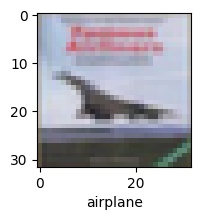

In [38]:
plot_sample(X_test, y_test,3)

In [39]:
classes[y_classes[3]]

'airplane'

In [40]:
classes[y_classes[3]]

'airplane'

In [41]:
# Exercise
# Use CNN to do handwritten digits classification using MNIST dataset. You can use this notebook as a reference: https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/main/1_digits_recognition/digits_recognition_neural_network.ipynb

# Above we used ANN for digits classification. You need to modify this code to use CNN instead. Check how accuracy improves fast with CNN and figure out how CNN can be a better choice for doing image classification compared to ANN. Once you have worked on this problem on your own, you can check my solution by clicking on this link: Solution